<a href="https://colab.research.google.com/github/AdityaB1234/StockPredictors/blob/main/Better_Stock_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import yfinance as yfin
import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import datetime as dt

In [ ]:
company = "CVNA"
yfin.pdr_override()

In [ ]:
start = dt.datetime(2010, 1, 1)
end = dt.datetime(2020, 1, 1)

In [ ]:
data = pdr.get_data_yahoo(company, start, end)
data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-28,13.50,13.94,10.70,11.10,11.10,11297800
2017-05-01,11.60,11.73,10.70,10.77,10.77,1291300
2017-05-02,10.95,10.95,10.00,10.10,10.10,991500
2017-05-03,10.18,10.18,8.18,8.72,8.72,3356500
2017-05-04,8.59,10.04,8.14,9.98,9.98,1840200


In [ ]:
prediction_days = 100

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data["Close"].values.reshape(-1,1))

In [ ]:
x_train = []
y_train = []

In [ ]:
for i in range(prediction_days, len(scaled_data)):
  x_train.append(scaled_data[i-prediction_days:i, 0])
  y_train.append(scaled_data[i,0])

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)



In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Predictions of next closing value


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, epochs=35, batch_size=50)

Epoch 1/25
12/12 [==============================] - 12s 268ms/step - loss: 0.0800
Epoch 2/25
12/12 [==============================] - 3s 225ms/step - loss: 0.0240
Epoch 3/25
12/12 [==============================] - 3s 224ms/step - loss: 0.0122
Epoch 4/25
12/12 [==============================] - 3s 224ms/step - loss: 0.0090
Epoch 5/25
12/12 [==============================] - 4s 325ms/step - loss: 0.0086
Epoch 6/25
12/12 [==============================] - 3s 224ms/step - loss: 0.0091
Epoch 7/25
12/12 [==============================] - 3s 228ms/step - loss: 0.0090
Epoch 8/25
12/12 [==============================] - 3s 228ms/step - loss: 0.0079
Epoch 9/25
12/12 [==============================] - 4s 334ms/step - loss: 0.0076
Epoch 10/25
12/12 [==============================] - 3s 226ms/step - loss: 0.0076
Epoch 11/25
12/12 [==============================] - 3s 226ms/step - loss: 0.0065
Epoch 12/25
12/12 [==============================] - 3s 228ms/step - loss: 0.0075
Epoch 13/25
12/12 [=====

In [ ]:
test_start = dt.datetime(2020, 1, 1)
test_end = dt.datetime.now()

In [ ]:
test_data = pdr.get_data_yahoo(company, test_start, test_end)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
actual_prices = test_data["Close"].values

30/30 [==============================] - 4s 78ms/step


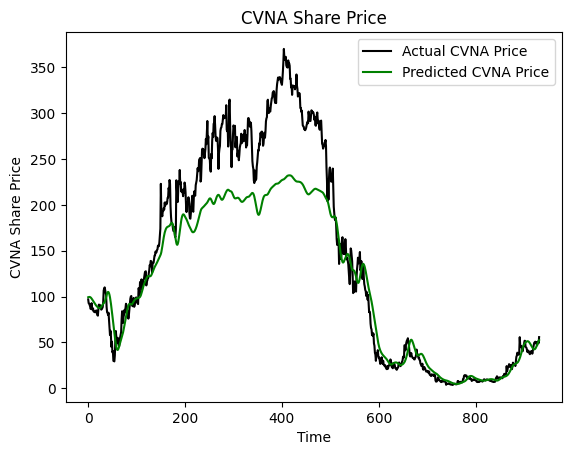

In [ ]:
total_dataset = pd.concat((data["Close"], test_data["Close"]), axis = 0)


model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

x_test = []
for i in range(prediction_days, len(model_inputs)):
  x_test.append(model_inputs[i-prediction_days:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_prices = model.predict(x_test)
predicted_prices = scaler.inverse_transform(predicted_prices)


plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel('Time')
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

In [ ]:
real_data=[model_inputs[len(model_inputs) + 1 - prediction_days:len(model_inputs+1), 0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))
prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Prediction: {prediction} ")

1/1 [==============================] - 2s 2s/step
Prediction: [[53.34618]] 
